### Simplest case - one set of old proteins, one set of new proteins

New proteins should be processed as before. here we have 5 new proteins, which for the sake of example are named New1-5

Successfully initialized proteins: ['New1', 'New2', 'New3', 'New4', 'New5']
1 domains found in AlphaFold structure for New1: [Domain(id=AF_D1, start=125, end=221, domain_type='AF')]
14 domains found in UniProt for New1: [Domain(id=Disordered, start=0, end=130, domain_type='UniProt'), Domain(id=H3-like, start=132, end=224, domain_type='UniProt'), Domain(id=Polar residues, start=39, end=54, domain_type='UniProt'), Domain(id=Basic and acidic residues, start=55, end=86, domain_type='UniProt'), Domain(id=Polar residues, start=87, end=122, domain_type='UniProt'), Domain(id=Phosphoserine, start=73, end=73, domain_type='UniProt'), Domain(id=Phosphoserine, start=74, end=74, domain_type='UniProt'), Domain(id=Phosphothreonine, start=75, end=75, domain_type='UniProt'), Domain(id=Phosphoserine, start=76, end=76, domain_type='UniProt'), Domain(id=in strain: Tai 255.1, start=112, end=113, domain_type='UniProt'), Domain(id=HELIX, start=149, end=163, domain_type='UniProt'), Domain(id=STRAND, start=164,

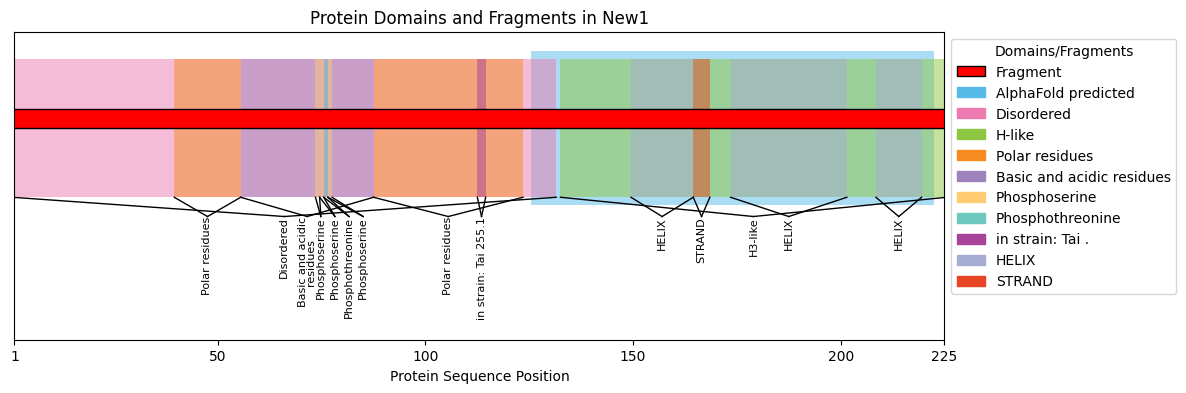

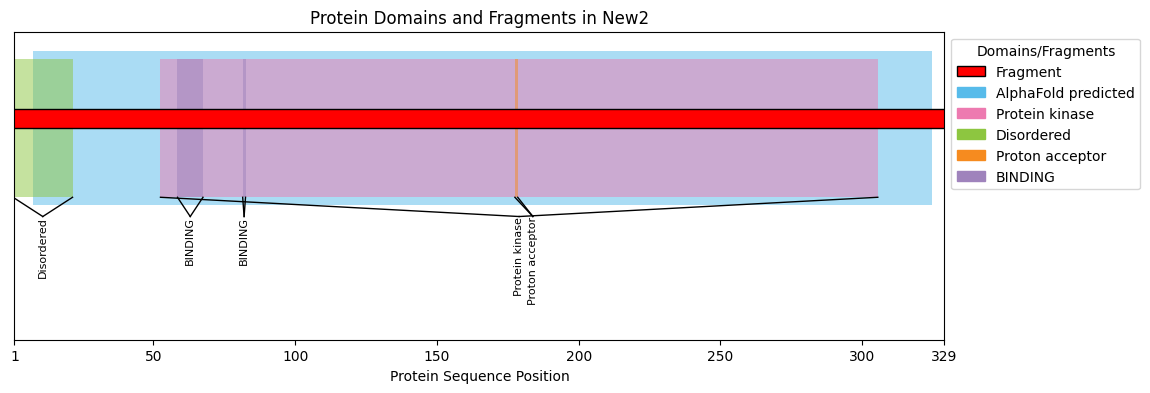

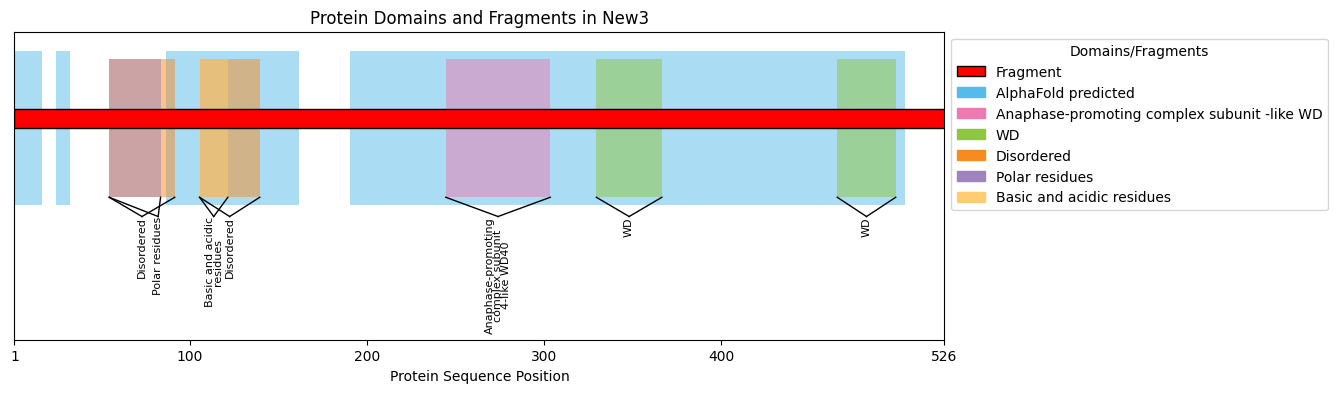

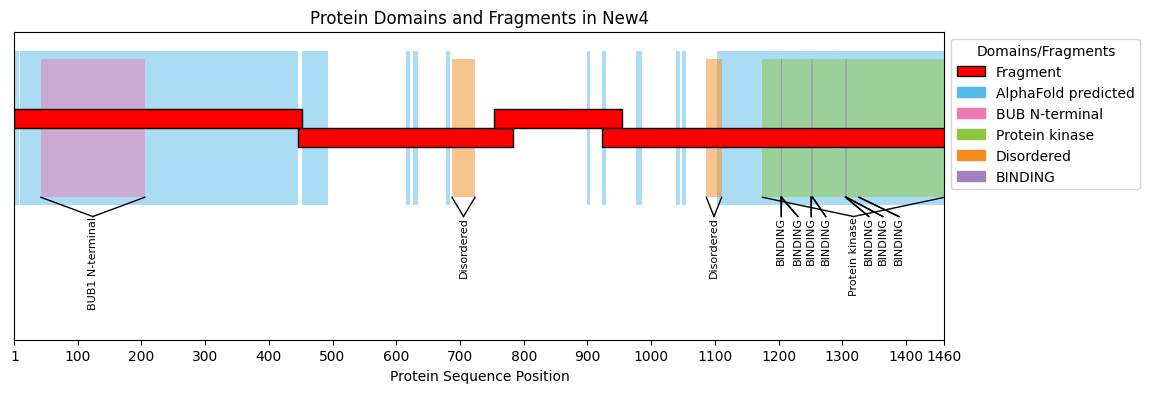

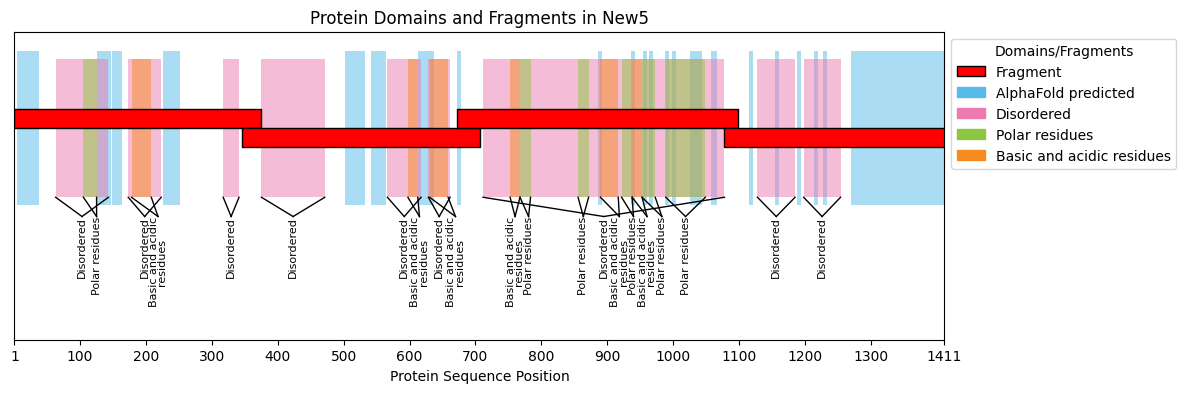

In [13]:
from alphafragment.process_proteins_csv import initialize_proteins_from_csv
from alphafragment.fragment_protein import fragment_protein
from alphafragment.domain_compilation import compile_domains
from alphafragment.plot_fragments import plot_fragmentation_output

new_input_csv_path = "sample_data/sample_extra_proteins.csv"
# Initialising the new proteins
new_proteins, new_df = initialize_proteins_from_csv(new_input_csv_path)

# Updating the new proteins with domain and fragment information
for protein in new_proteins:
    domains = []
    fragments = []
    domains = compile_domains(protein, manual=False, protein_data=new_df)
    for domain in domains:
        protein.add_domain(domain)
    fragments = fragment_protein(protein)
    for fragment in fragments:
        protein.add_fragment(fragment)
    #remember to add a save location if you want to save the images
    plot_fragmentation_output(protein, fragments, label=['UniProt', 'manually_defined'])

If you saved the domains and fragments found in the previous set of proteins to a csv, you can now reinitialise these proteins from that, without having to repeat domain finding or fragmentation. Here we have an example set of 6 proteins previously screened, named Old1-6.

In [14]:
from alphafragment.process_proteins_csv import reinitialize_proteins_from_csv

old_input_csv_path = "sample_data/sample_old_proteins.csv"
old_proteins, old_df = reinitialize_proteins_from_csv(old_input_csv_path)

Successfully initialized proteins: ['Old1', 'Old2', 'Old3', 'Old4', 'Old5', 'Old6']
12 domains found in csv for Old1: [Domain(id=AF_D1, start=9, end=18, domain_type='manually_defined'), Domain(id=AF_D2, start=68, end=78, domain_type='manually_defined'), Domain(id=AF_D3, start=191, end=227, domain_type='manually_defined'), Domain(id=AF_D4, start=314, end=329, domain_type='manually_defined'), Domain(id=AF_D5, start=330, end=339, domain_type='manually_defined'), Domain(id=AF_D6, start=368, end=384, domain_type='manually_defined'), Domain(id=AF_D7, start=410, end=415, domain_type='manually_defined'), Domain(id=Disordered, start=0, end=68, domain_type='manually_defined'), Domain(id=Disordered_2, start=89, end=109, domain_type='manually_defined'), Domain(id=Disordered_3, start=124, end=149, domain_type='manually_defined'), Domain(id=Polar_residues, start=43, end=68, domain_type='manually_defined'), Domain(id=Polar_residues_2, start=92, end=106, domain_type='manually_defined')]
12 domains fou

Now that we have prepared the old and new sets of proteins, we can create the master list of proteins and dataframe, which contains all the information we will need on all the proteins.

In [15]:
import pandas as pd

# combine lists of proteins
proteins = old_proteins + new_proteins
# combine dfs
df = pd.concat([old_df, new_df], ignore_index=True)

The only information not retained in this list and dataframe is which proteins were in the original screen and which are new. In fact, to generate the protein pair combinations we actually don't need this list or dataframe at all - so we will put these aside for now. Instead, we can use the separate protein lists from before to make a list of which proteins are in each category.

In [17]:
old_protein_names = [protein.name for protein in old_proteins]
new_protein_names = [protein.name for protein in new_proteins]

print("Old protein names: ", old_protein_names)
print("New protein names: ", new_protein_names)

Old protein names:  ['Old1', 'Old2', 'Old3', 'Old4', 'Old5', 'Old6']
New protein names:  ['New1', 'New2', 'New3', 'New4', 'New5']


Using these lists, we can now generate all the protein pairs that won't have been in the original screen - ie the each of the new proteins against each other, and agaiinst each of the old proteins.

In [20]:
import itertools

new_pairs  = set()
# Pairs within new proteins
for pair in itertools.combinations_with_replacement(new_protein_names, 2):
    new_pairs.add(tuple(sorted(pair)))
# Pairs between old and new proteins
for protein1 in old_protein_names:
    for protein2 in new_protein_names:
        pair = tuple(sorted([protein1, protein2]))
        new_pairs.add(pair)

print(new_pairs)

{('New1', 'Old6'), ('New3', 'New3'), ('New3', 'New5'), ('New2', 'Old5'), ('New1', 'Old2'), ('New4', 'Old4'), ('New4', 'New5'), ('New1', 'Old3'), ('New5', 'Old2'), ('New2', 'New4'), ('New5', 'Old6'), ('New3', 'Old5'), ('New1', 'Old1'), ('New1', 'New2'), ('New2', 'Old2'), ('New5', 'Old3'), ('New2', 'Old6'), ('New4', 'Old5'), ('New1', 'Old4'), ('New3', 'New4'), ('New2', 'Old3'), ('New1', 'New3'), ('New1', 'New5'), ('New5', 'Old1'), ('New4', 'New4'), ('New3', 'Old2'), ('New3', 'Old6'), ('New5', 'Old4'), ('New5', 'New5'), ('New2', 'New2'), ('New2', 'Old1'), ('New4', 'Old6'), ('New2', 'Old4'), ('New4', 'Old2'), ('New3', 'Old3'), ('New1', 'Old5'), ('New2', 'New3'), ('New2', 'New5'), ('New4', 'Old3'), ('New1', 'New4'), ('New3', 'Old1'), ('New1', 'New1'), ('New5', 'Old5'), ('New4', 'Old1'), ('New3', 'Old4')}


Next, we can convert these sets to dataframes which can be saved as csv files. These can then be used as input to the fasta/pulldown file creation functions, using the `method = 'specific'` argument. 

In [ ]:
from alphafragment.fragment_file_creation import output_fastas

new_pairs_df = pd.DataFrame(list(new_pairs), columns=['Protein1', 'Protein2'])
#Save pairs to CSV file
new_pairs_df.to_csv('sample_data/new_pairs.csv', index=False, header=False)
# Create FASTA files with fragment combinations (could equally create pulldown input)
output_fastas(proteins, save_location="output/new_pairs", method='specific', combinations_csv="sample_data/new_pairs.csv")


### More complex case - multiple sets of new and old proteins

This is an example of how to deal with a more complex case of adding to a screen - here there are 2 old sets of proteins representing different parts of the centrosome - PCM and centriole. These been run against every protein in ther own set. We now want to add in a new set of proteins, which contains some PCM proteins, some centriole proteins, and some proteins from another organelle, the kinetochore.

We want to first of all create folders to help us finish the PCM and centriole screens by adding the new PCM and centriole proteins into the relevant groups. We then want to create a second folder of all pairs that have not yet been run, to compare the predictions strength of proteins within a group to the prediction strength between groups.

In [8]:
# file paths
centriole_input_csv_path = "output/centriole_core_fragmented_proteins2.csv"
PCM_input_csv_path = "output/PCM_core_fragmented_proteins2.csv"
new_input_csv_path = "sample_data/extra_proteins.csv"

# Reading in the old proteins
centriole_proteins, centriole_df = reinitialize_proteins_from_csv(centriole_input_csv_path)
PCM_proteins, PCM_df = reinitialize_proteins_from_csv(PCM_input_csv_path)
# Initialising the new proteins
new_proteins, new_df = initialize_proteins_from_csv(new_input_csv_path)

Successfully initialized proteins: ['Asl', 'PLK4', 'Sas-6', 'Ana2', 'Sas-4', 'Rcd4', 'Cep135', 'PLP', 'Cep97', 'Centrobin', 'Poc1', 'alpha-tubulin', 'beta-tubulin']
Reinitialized 13 proteins from output/centriole_core_fragmented_proteins2.csv: ['Asl', 'PLK4', 'Sas-6', 'Ana2', 'Sas-4', 'Rcd4', 'Cep135', 'PLP', 'Cep97', 'Centrobin', 'Poc1', 'alpha-tubulin', 'beta-tubulin']
Successfully initialized proteins: ['Asl', 'Spd-2', 'TACC', 'CHC', 'gamma-tubulin', 'GCP2', 'GCP3', 'GCP4', 'GCP5', 'Grip71', 'Mzt1', 'Mud', 'PLK1', 'AurA']
Reinitialized 14 proteins from output/PCM_core_fragmented_proteins2.csv: ['Asl', 'Spd-2', 'TACC', 'CHC', 'gamma-tubulin', 'GCP2', 'GCP3', 'GCP4', 'GCP5', 'Grip71', 'Mzt1', 'Mud', 'PLK1', 'AurA']
No valid accession ID provided. Skipping UniProt fetch operation.
UniProt fetch failed for Ana3; using manually provided sequence.
No valid accession ID provided. Skipping UniProt fetch operation.
UniProt fetch failed for Cnn; using manually provided sequence.
No valid acce

7 domains found in AlphaFold structure for CP110: [Domain(id=AF_D1, start=1, end=15, domain_type='AF'), Domain(id=AF_D2, start=54, end=59, domain_type='AF'), Domain(id=AF_D3, start=64, end=93, domain_type='AF'), Domain(id=AF_D4, start=159, end=172, domain_type='AF'), Domain(id=AF_D5, start=229, end=245, domain_type='AF'), Domain(id=AF_D6, start=306, end=379, domain_type='AF'), Domain(id=AF_D7, start=548, end=662, domain_type='AF')]
7 domains found in UniProt for CP110: [Domain(id=Disordered, start=189, end=215, domain_type='UniProt'), Domain(id=Disordered, start=262, end=310, domain_type='UniProt'), Domain(id=Disordered, start=383, end=416, domain_type='UniProt'), Domain(id=Disordered, start=429, end=543, domain_type='UniProt'), Domain(id=Polar residues, start=262, end=303, domain_type='UniProt'), Domain(id=Polar residues, start=383, end=411, domain_type='UniProt'), Domain(id=Polar residues, start=446, end=490, domain_type='UniProt')]
No user-specified domains found for protein CP110.


/Users/poppy/Library/CloudStorage/OneDrive-Nexus365/AlphaFold_Workflow/Input_preparation/src/alphafragment/plot_fragments.py:203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


1 domains found in AlphaFold structure for ZWILCH: [Domain(id=AF_D1, start=5, end=640, domain_type='AF')]
1 domains found in UniProt for ZWILCH: [Domain(id=Phosphoserine, start=311, end=311, domain_type='UniProt')]
No user-specified domains found for protein ZWILCH.
ZWILCH  is  641  residues long and has  1 fragments : [(0, 641)]
HTTP Error: Could not retrieve file from https://alphafold.ebi.ac.uk/files/AF-O96695-F1-predicted_aligned_error_v4.json. Error message: 404 Client Error: Not Found for url: https://alphafold.ebi.ac.uk/files/AF-O96695-F1-predicted_aligned_error_v4.json
1 domains found in UniProt for ROD: [Domain(id=RZZ complex subunit KNTC1/ROD C-terminal, start=1541, end=2080, domain_type='UniProt')]
No user-specified domains found for protein ROD.
ROD  is  2098  residues long and has  6 fragments : [(1, 385), (355, 739), (709, 1093), (1063, 1371), (1341, 1541), (1511, 2098)]
4 domains found in AlphaFold structure for Gcp6: [Domain(id=AF_D1, start=2, end=88, domain_type='AF'),

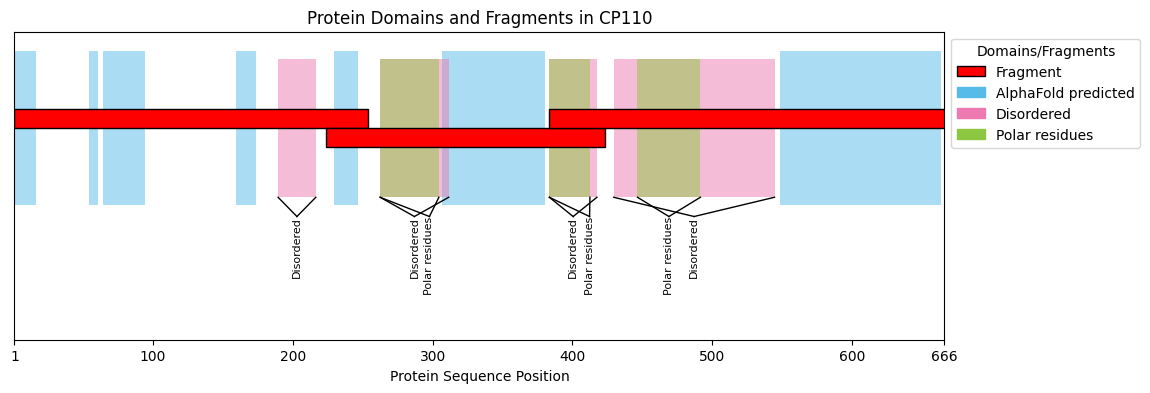

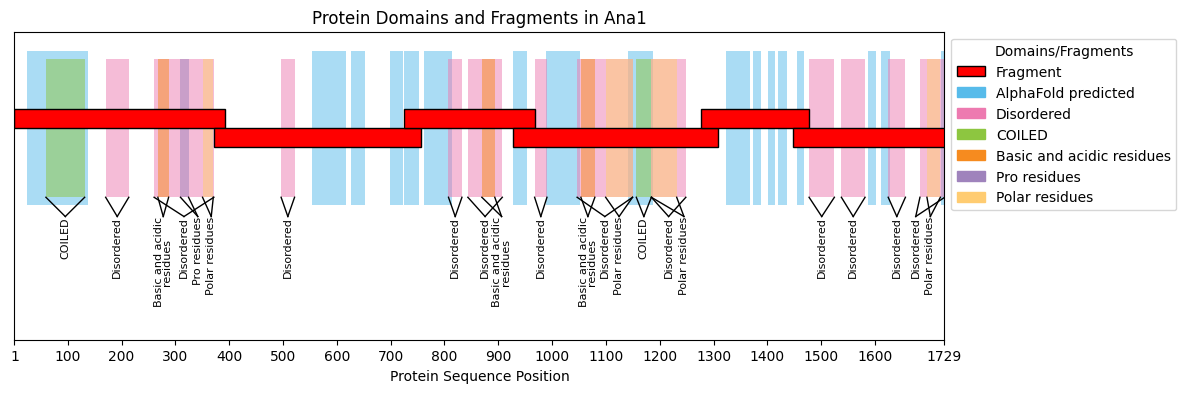

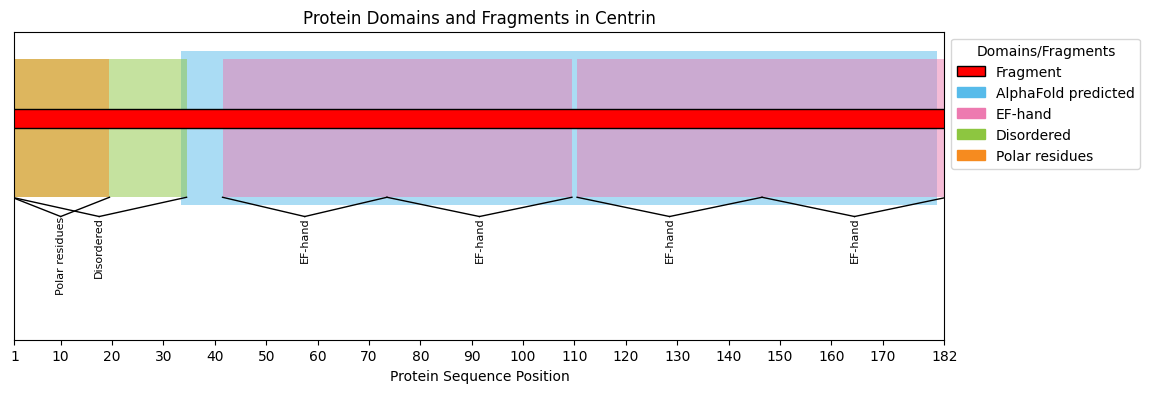

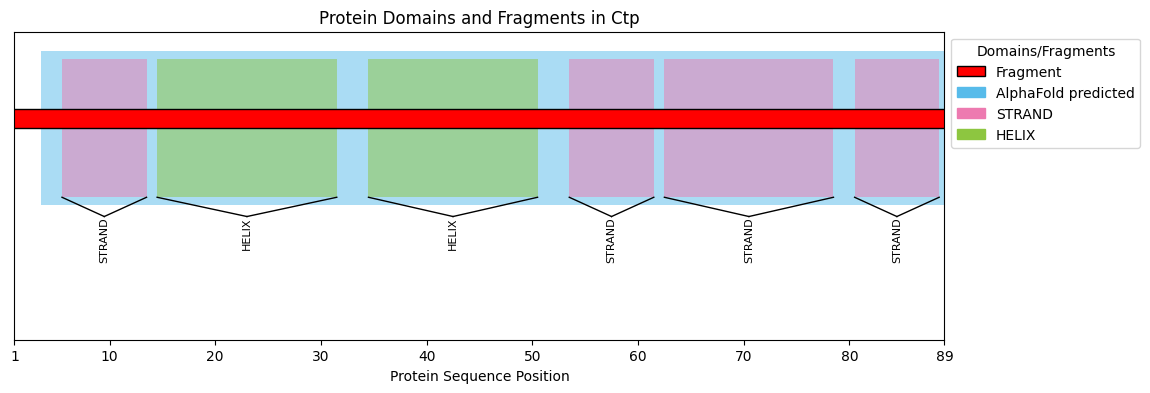

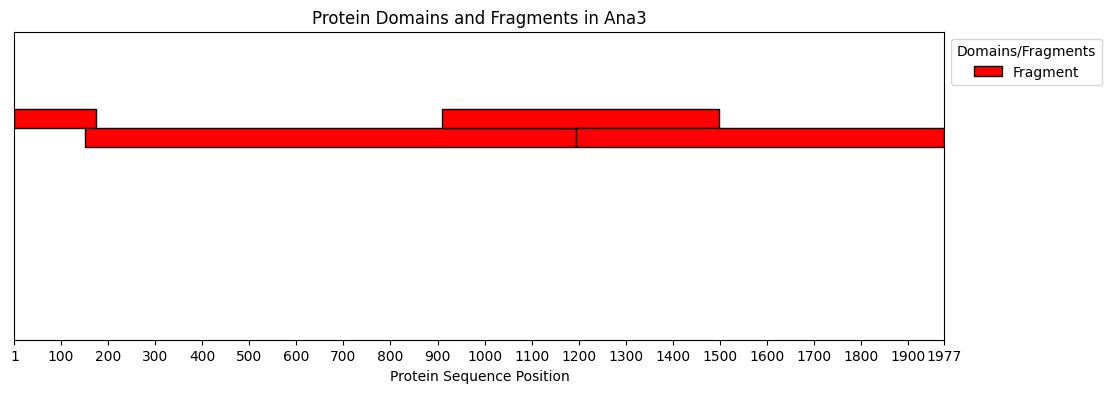

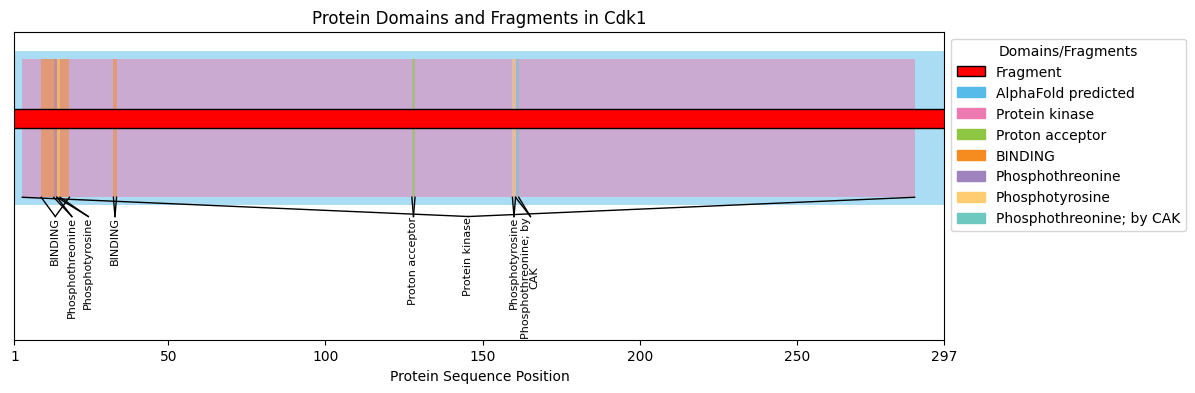

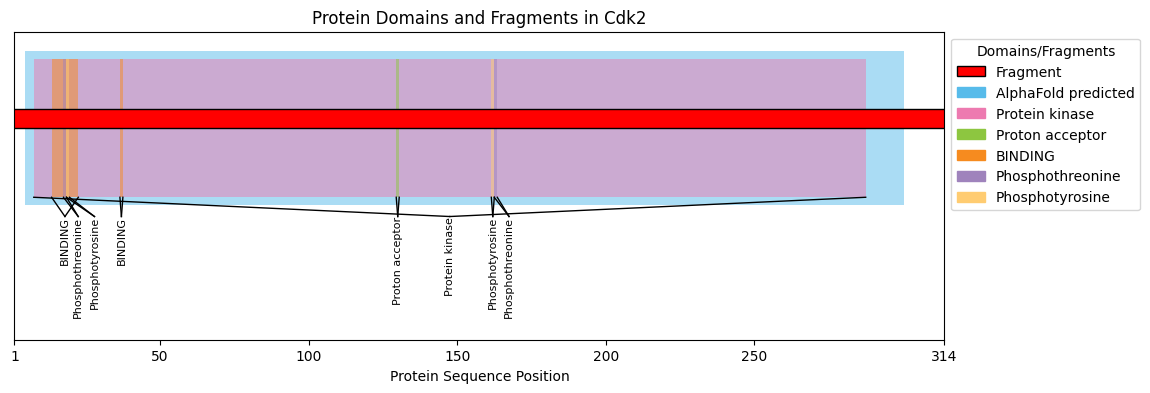

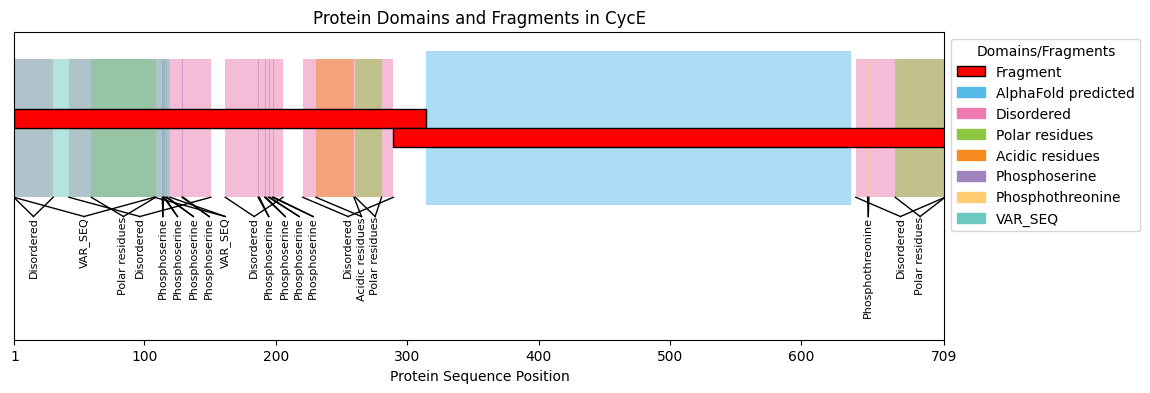

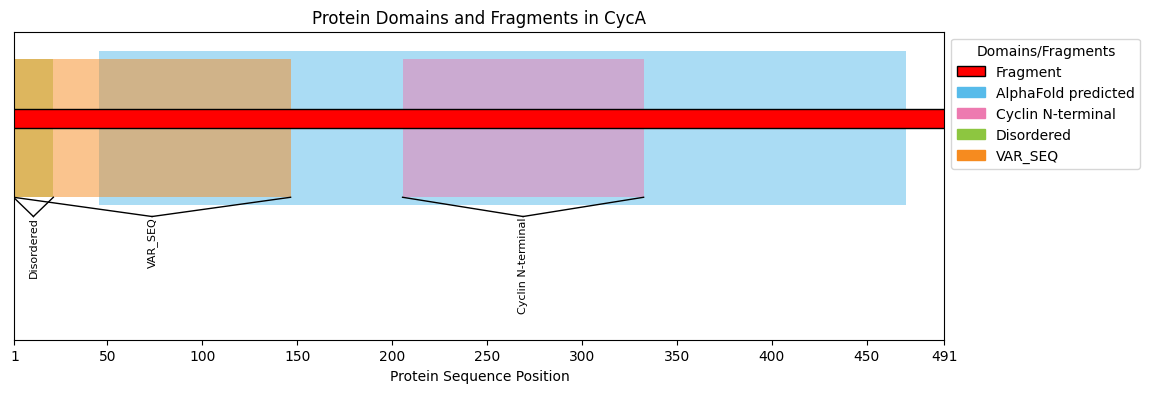

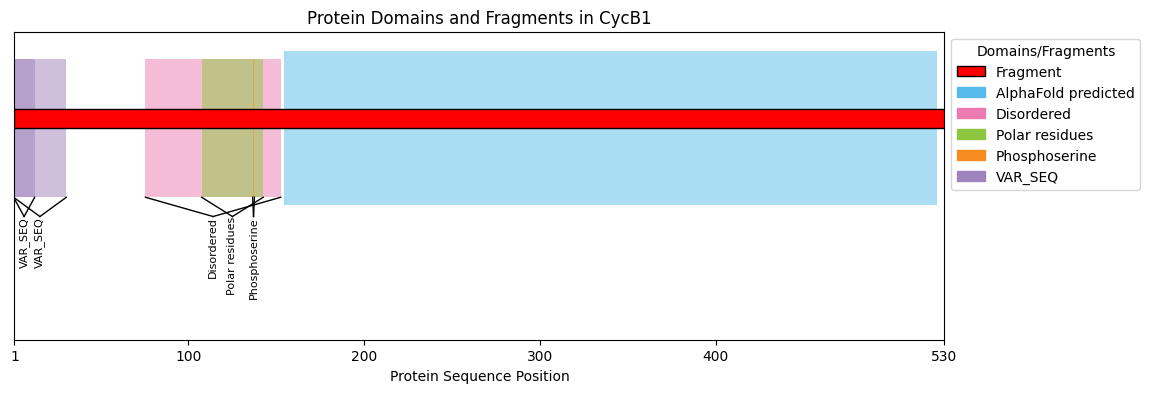

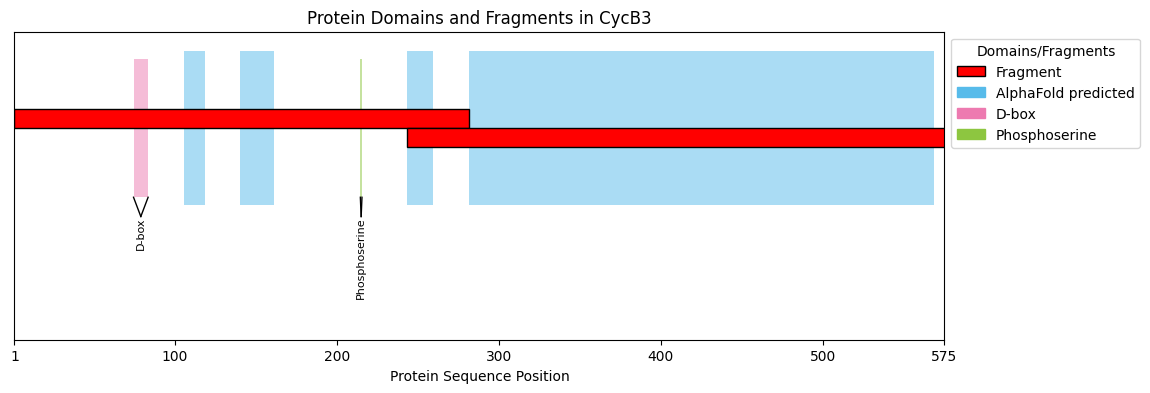

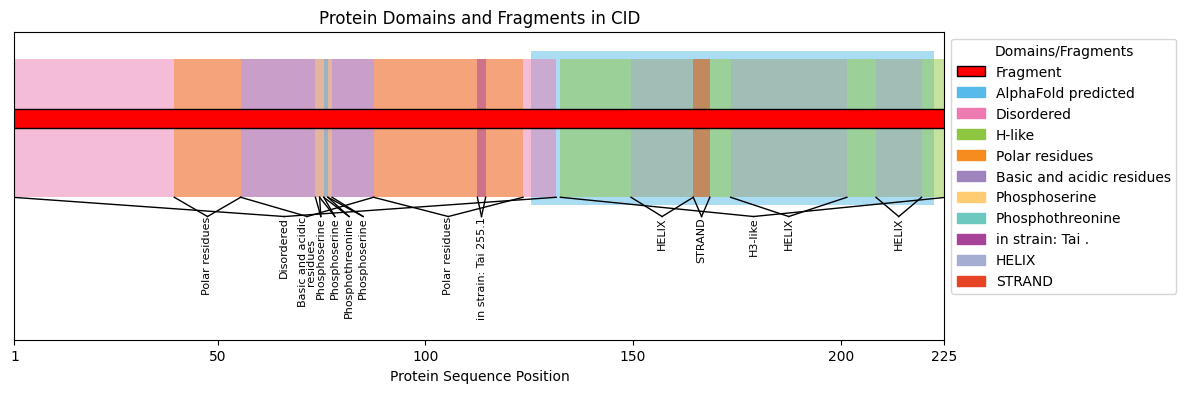

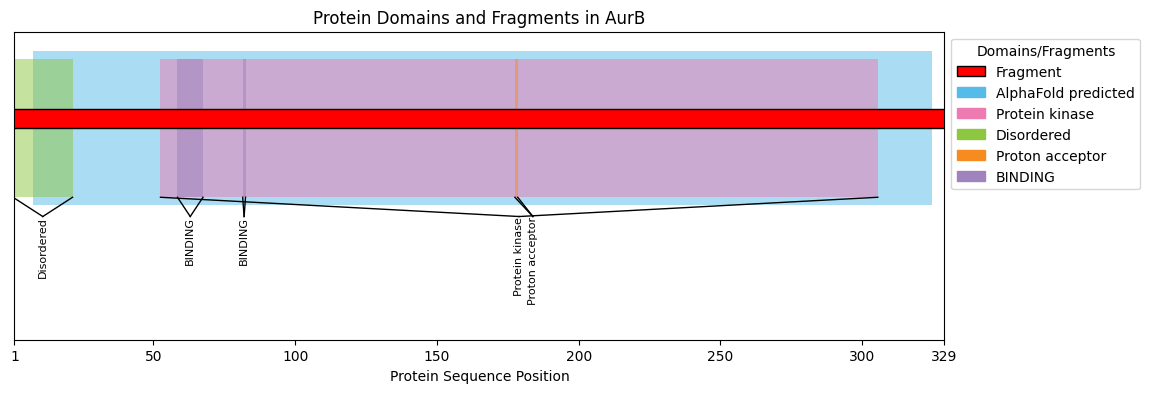

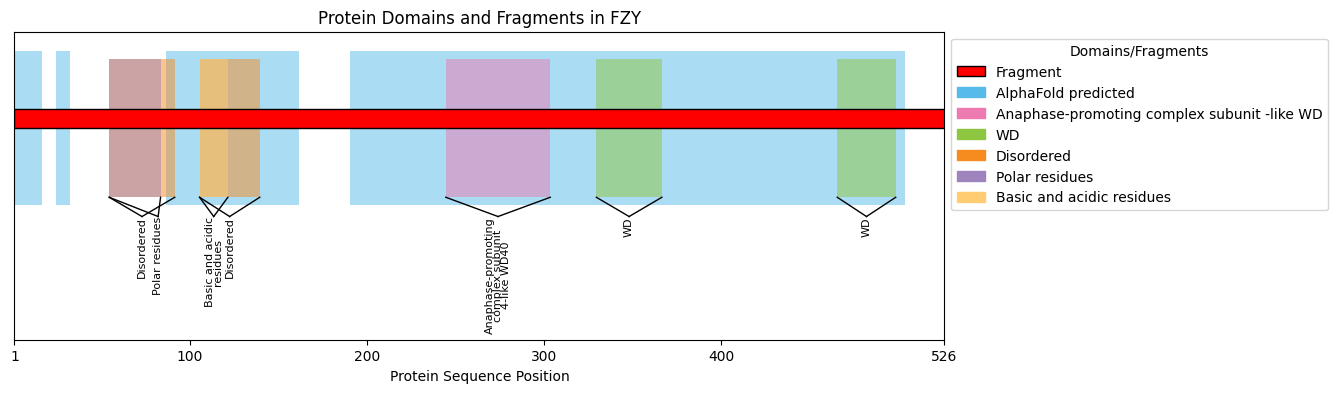

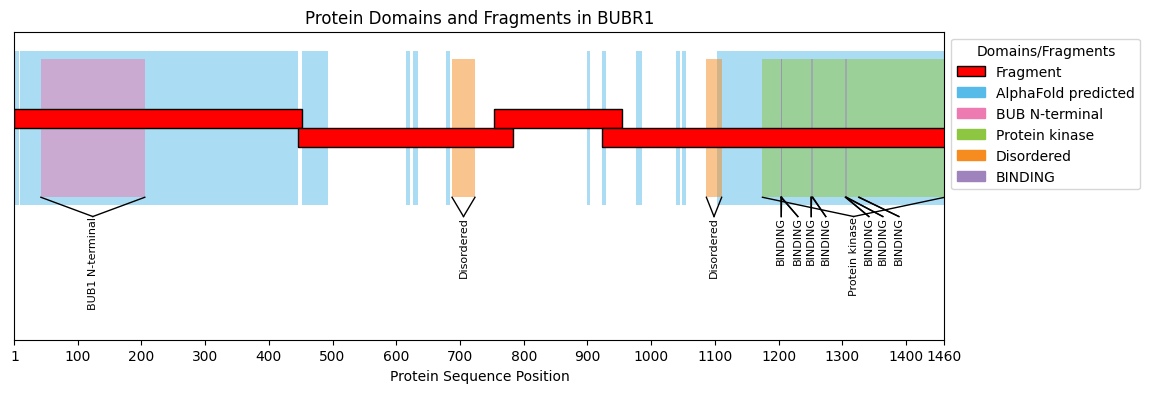

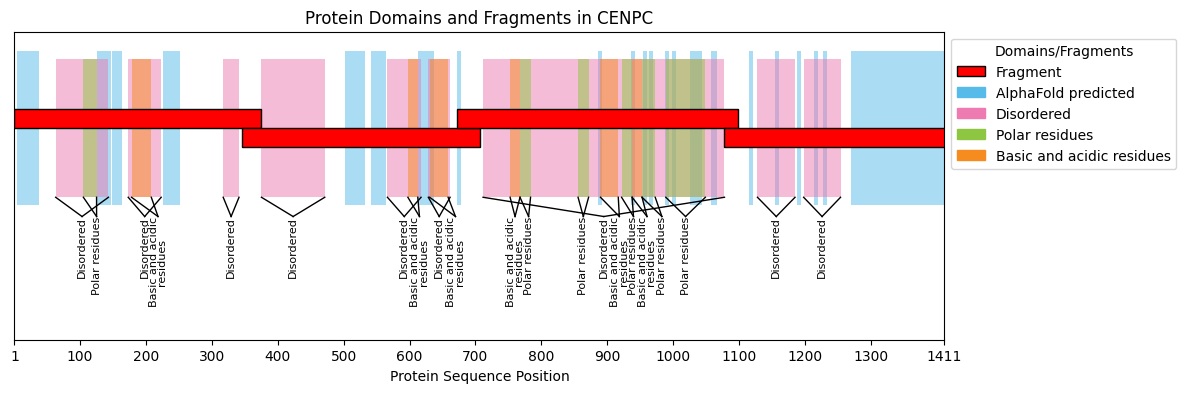

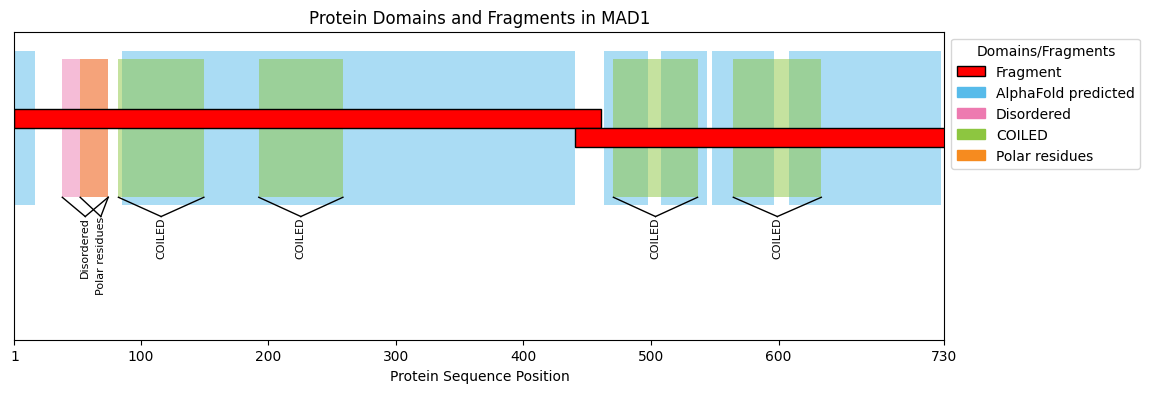

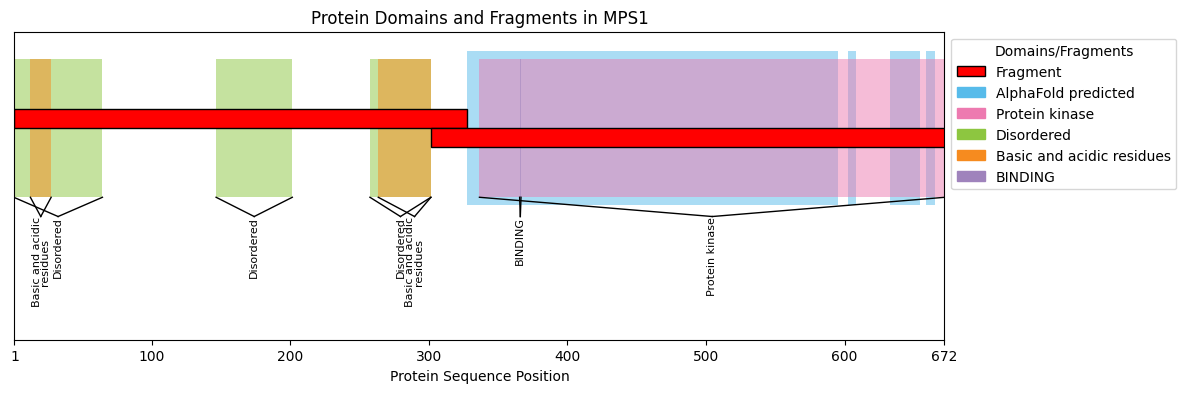

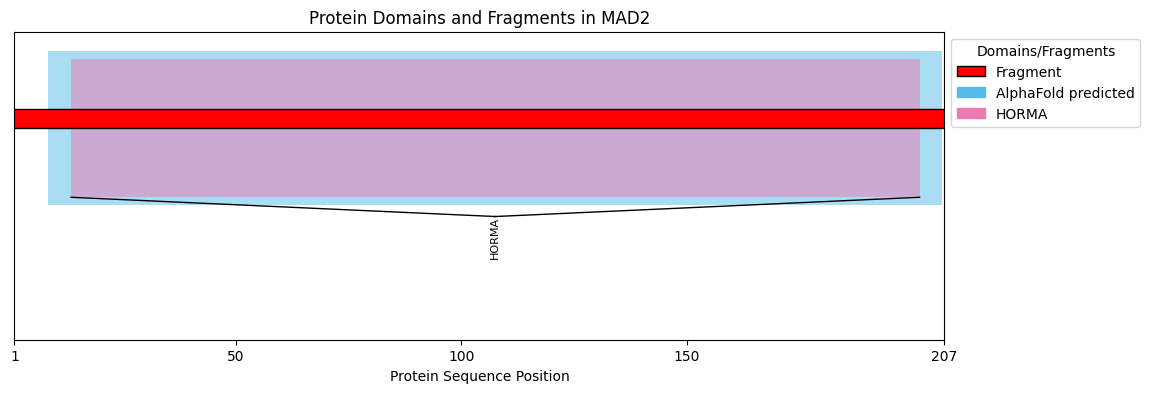

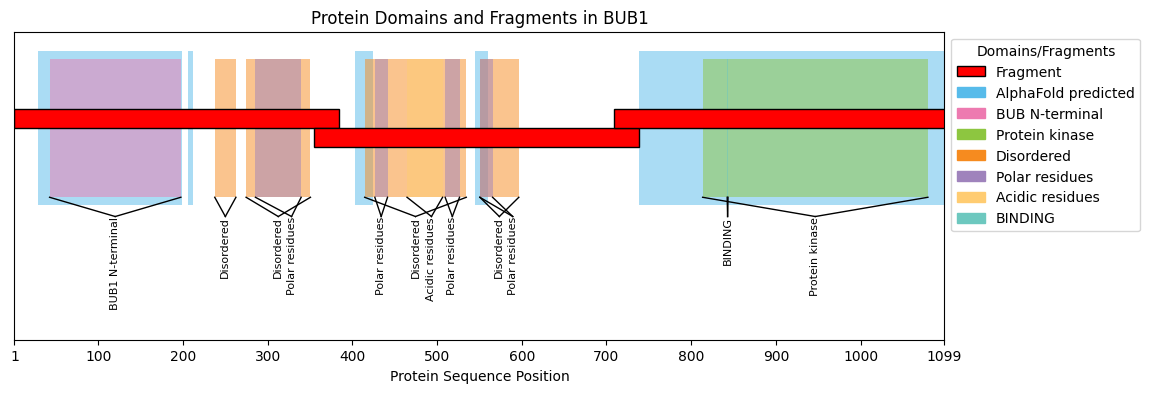

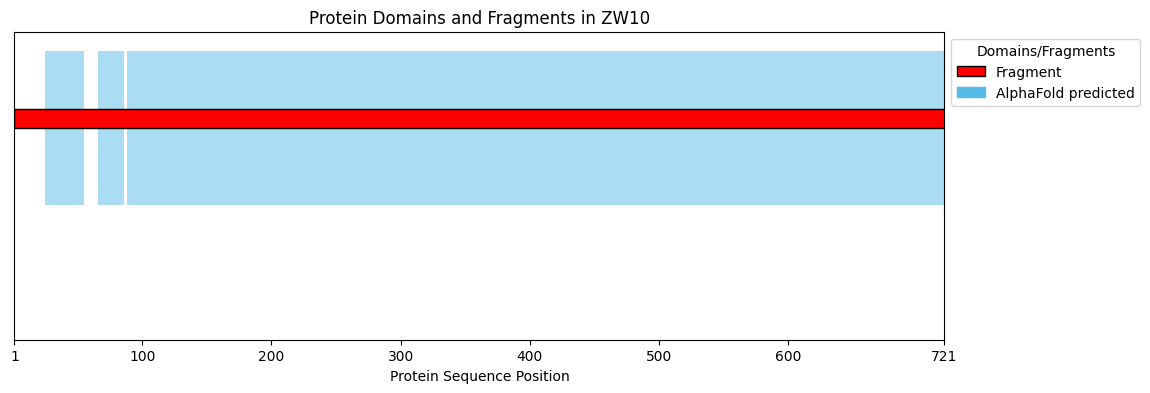

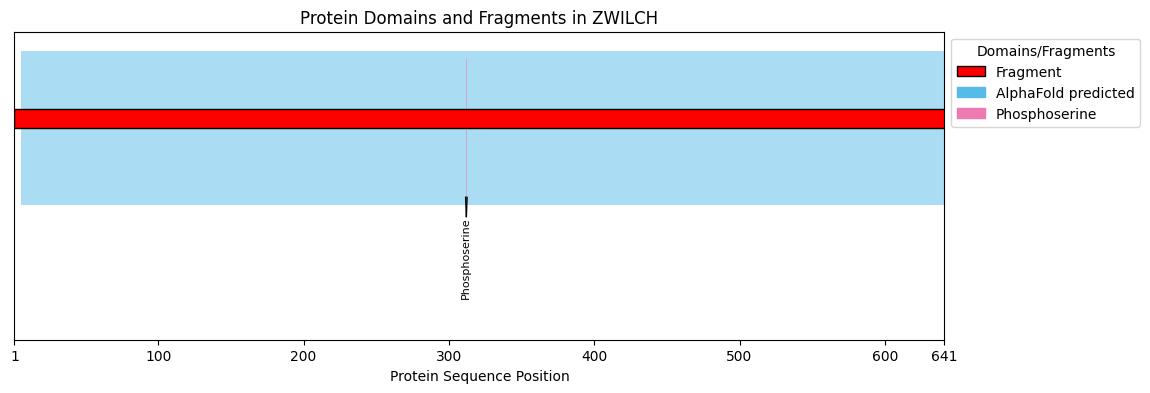

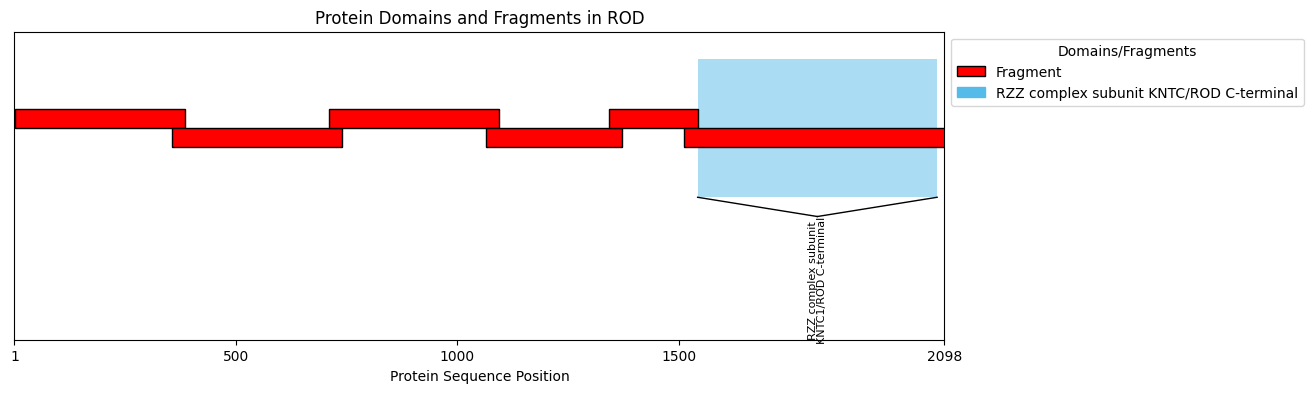

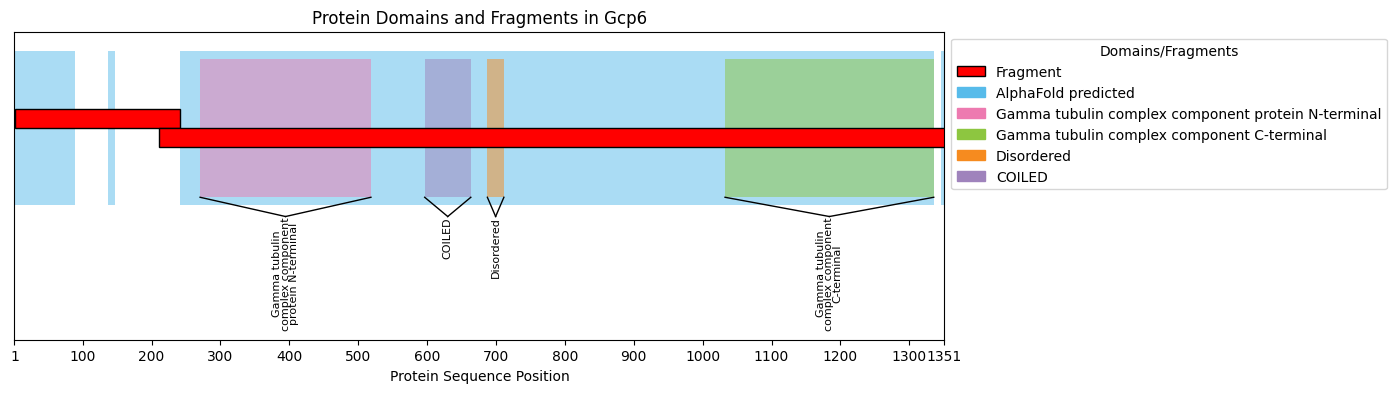

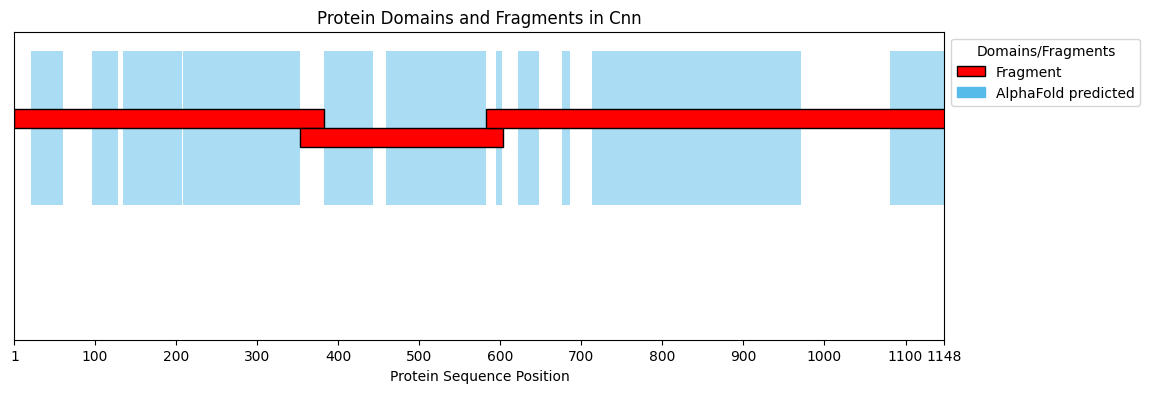

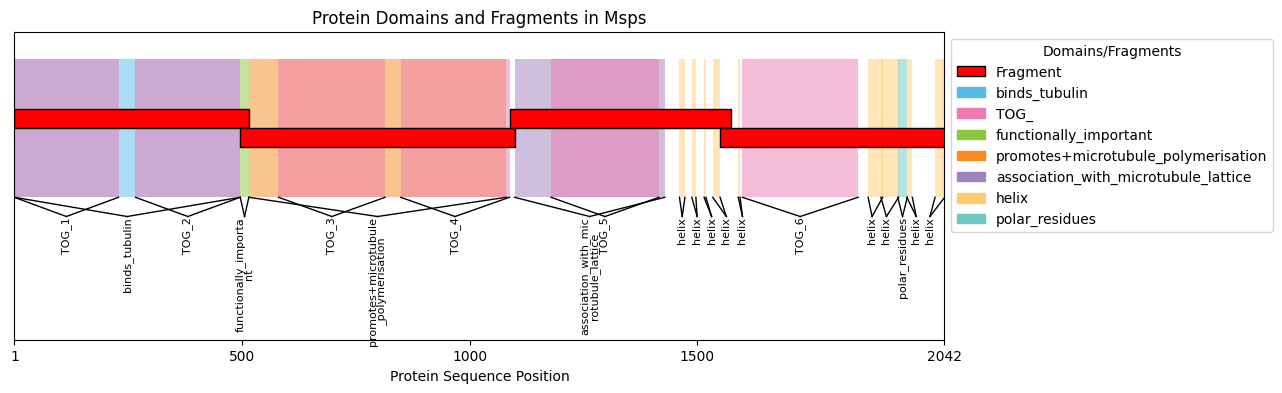

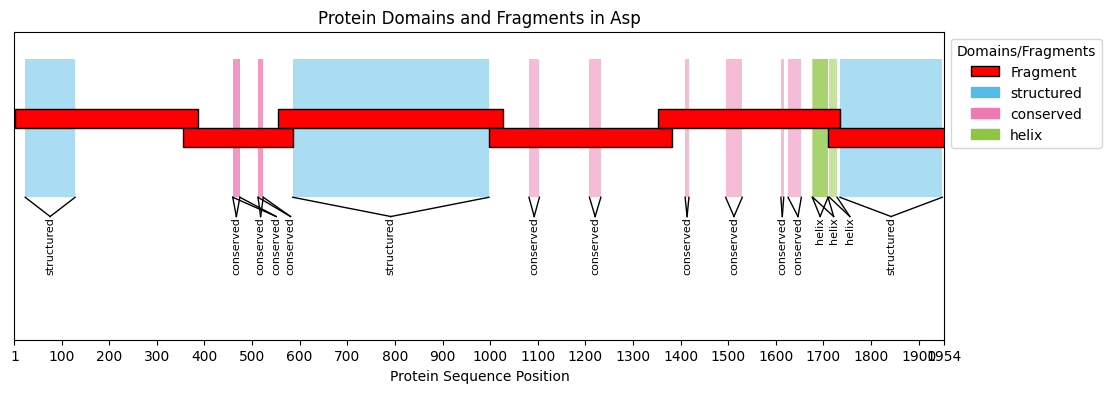

In [9]:
from alphafragment.fragment_protein import fragment_protein
from alphafragment.domain_compilation import compile_domains
from alphafragment.plot_fragments import plot_fragmentation_output
from alphafragment.process_proteins_csv import fragments_from_csv, domains_from_manual_pae

image_save_location = "output/sample_extra_proteins_fragmentation_images"

for protein in new_proteins:
    domains = []
    fragments = []
    fragments = fragments_from_csv(new_df, protein)
    if not fragments:
        domains = domains_from_manual_pae(new_df, protein)
        if not domains:
            domains = compile_domains(protein, protein_data=new_df)
        for domain in domains:
            protein.add_domain(domain)
        fragments = fragment_protein(protein)
    for fragment in fragments:
        protein.add_fragment(fragment)
    plot_fragmentation_output(protein, fragments, image_save_location, label=['UniProt', 'manually_defined'])

Now we have prepared the old and new sets of proteins, we can once again create a  master list and dataframe of proteins, which contains all the information we will need on all the proteins.

Note - here one protein appears in both the original pcm and centriole protein sets. The data is the same in both appearances, so this should not cause any issues

In [ ]:
# combine lists of proteins
proteins = centriole_proteins + PCM_proteins + new_proteins
# combine dfs
df = pd.concat([centriole_df, PCM_df, new_df], ignore_index=True)

Now we can use the separate protein lists from before to make a list of proteins in each category.

As mentioned before, here the new proteins are also split into categories - we have some belonging to the Centriole and PCM (ie new proteins to be added to the original categories) as well as some belonging to the new categories of Kinetochore. This information was in the dataframe in a column `Category`, so we will make these into separate lists now.

In [ ]:
original_centriole_proteins = [protein.name for protein in centriole_proteins]
original_pcm_proteins = [protein.name for protein in PCM_proteins]

new_centriole_proteins = new_df[new_df['Category'] == 'Centriole core']['Name'].tolist()
new_pcm_proteins = new_df[new_df['Category'] == 'PCM core']['Name'].tolist()
new_other_proteins = new_df[new_df['Category'].isin(['Kinetochore'])]['Name'].tolist()

Next, we will find the protein pairs that have already been screened - ie the within group pairs for the old centriole and PCM proteins. This is not using the protein objects, but rather just the list of protein names in each category to generate a combinations list that can then be completed with information about the protein fragments.

If the original pairs were decided differently this will of course need to be adjusted to give the actual pairs that have been tested - but here we are assuming you are doing a screen in which every protein is paired with every other.

In [ ]:
import itertools

existing_pairs = set()

# Pairs within original centriole proteins
for pair in itertools.combinations_with_replacement(original_centriole_proteins, 2):
    existing_pairs.add(tuple(sorted(pair)))

# Pairs within original PCM proteins
for pair in itertools.combinations_with_replacement(original_pcm_proteins, 2):
    existing_pairs.add(tuple(sorted(pair)))

Now we can generate the new pairs. While this could be done more simply if there was no stratification in the new proteins (as in the first example), here we want to generate separate sets to complete the centriole and PCM groups before running all other proteins - this is in order to prioritise running these predictions and to have them separated into different folders for analysis.

In [ ]:
# Group 1: New centriole proteins with each other and with original centriole proteins
new_centriole_pairs = set()
all_centriole_proteins = original_centriole_proteins + new_centriole_proteins
for protein1 in new_centriole_proteins:
    for protein2 in all_centriole_proteins:
        pair = tuple(sorted([protein1, protein2]))
        new_centriole_pairs.add(pair)
new_centriole_pairs -= existing_pairs

# Group 2: New PCM proteins with each other and with original PCM proteins
new_pcm_pairs = set()
all_pcm_proteins = original_pcm_proteins + new_pcm_proteins
for protein1 in new_pcm_proteins:
    for protein2 in all_pcm_proteins:
        pair = tuple(sorted([protein1, protein2]))
        new_pcm_pairs.add(pair)
new_pcm_pairs -= existing_pairs

# Group 3: All other novel pairs involving new proteins and/or original proteins from both groups
new_other_pairs = set()
# All new proteins from any category
all_new_proteins = new_centriole_proteins + new_pcm_proteins + new_other_proteins
# Combine original proteins from both groups
all_original_proteins = original_centriole_proteins + original_pcm_proteins
# Pairs between original centriole proteins and original PCM proteins
for protein1 in original_centriole_proteins:
    for protein2 in original_pcm_proteins:
        pair = tuple(sorted([protein1, protein2]))
        new_other_pairs.add(pair)
# Pairs between new proteins and original proteins
for protein1 in all_new_proteins:
    for protein2 in all_original_proteins:
        pair = tuple(sorted([protein1, protein2]))
        new_other_pairs.add(pair)
# Pairs between new proteins (including self-pairs)
for pair in itertools.combinations_with_replacement(all_new_proteins, 2):
    new_other_pairs.add(tuple(sorted(pair)))
# Remove pairs that already exist, ensuring no crossover between sets
new_other_pairs -= existing_pairs
new_other_pairs -= new_centriole_pairs
new_other_pairs -= new_pcm_pairs


Next, we can convert these sets to dataframes which can be saved as csv files. These can then be used as input to the fasta/pulldown file creation functions, using the `method = 'specific'` argument. 

In [ ]:
# Convert sets to DataFrames
new_centriole_df = pd.DataFrame(list(new_centriole_pairs), columns=['Protein1', 'Protein2'])
new_pcm_df = pd.DataFrame(list(new_pcm_pairs), columns=['Protein1', 'Protein2'])
new_other_df = pd.DataFrame(list(new_other_pairs), columns=['Protein1', 'Protein2'])

# Save to CSV files, with no header row
new_centriole_df.to_csv('sample_data/new_centriole_pairs.csv', index=False, header=False)
new_pcm_df.to_csv('sample_data/new_pcm_pairs.csv', index=False, header=False)
new_other_df.to_csv('sample_data/new_other_pairs.csv', index=False, header=False)

# Create FASTA files with fragment combinations
output_fastas(proteins, save_location="output/centriole_core_round_2", method='specific', combinations_csv="sample_data/new_centriole_pairs.csv")
output_fastas(proteins, save_location="output/PCM_core_round_2", method='specific', combinations_csv="sample_data/new_pcm_pairs.csv")
output_fastas(proteins, save_location="output/other_proteins", method='specific', combinations_csv="sample_data/new_other_pairs.csv")